In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Blitz Prediction: Milestone 2</h1?>

*Thomas Garity, Christopher Doyle, Chris Ruano, Hans Elasri, Rishi Hazra*

In **Milestone 2,** we conducted exploratory data analysis (EDA) and created helper functions that will accelerate our work in later milestones.

<h2>Data Structure</h2>

Our data can be downloaded from the 2025 Big Data Bowl on  <a href="https://www.kaggle.com/competitions/nfl-big-data-bowl-2025/data">Kaggle</a>

or using the Kaggle API: 

`kaggle competitions download -c nfl-big-data-bowl-2025`


**Instructions:**
- Download the dataset and unzip the file `nfl-big-data-bowl-2025.zip`
- The datasets will now saved in a `\nfl-big-data-bowl-2205` directory within the project repo
- Ensure that this directory is listed out in your `.gitignore` file to avoid pushing/pulling this to github

Now, check that the data have been downloaded:

In [2]:
# Ensure that all tables have been downloaded
print("Data Availabe: ")
os.listdir('./nfl-big-data-bowl-2025/')

Data Availabe: 


['plays.csv',
 'tracking_week_5.csv',
 'tracking_week_4.csv',
 'tracking_week_6.csv',
 'tracking_week_7.csv',
 'tracking_week_3.csv',
 'tracking_week_2.csv',
 'tracking_week_1.csv',
 'players.csv',
 'games.csv',
 'tracking_week_9.csv',
 'tracking_week_8.csv',
 'player_play.csv']

Let's now load and inspect our data:

In [3]:
# Load CSVs of data -- we only load one week of tracking to inspect its contents

plays_df = pd.read_csv('./nfl-big-data-bowl-2025/plays.csv')
players_df = pd.read_csv('./nfl-big-data-bowl-2025/players.csv')
games_df = pd.read_csv('./nfl-big-data-bowl-2025/games.csv')
player_play_df = pd.read_csv('./nfl-big-data-bowl-2025/player_play.csv')
tracking_week1 = pd.read_csv('./nfl-big-data-bowl-2025/tracking_week_1.csv')

In [4]:
# Look at first few rows
plays_df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man


In [5]:
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [6]:
games_df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23


In [7]:
player_play_df.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tracking_week1.head()

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN


### Defining the Blitz Indicator (`isBlitz`)

In order to estimate the likelihood of a blitz based on pre-snap information, we must first clearly define what constitutes a blitz.  

Since the dataset does not include an explicit "blitz" label, we construct a proxy indicator variable, `isBlitz`, using post-play player-level statistics. This label flags a defender as blitzing if they show any of the following characteristics:

- Identified as an **initial pass rusher**  
- **Caused pressure** on the quarterback  
- **Recorded a QB hit**  
- **Credited with a sack**

These conditions collectively approximate the presence of a blitz, particularly when applied to non-defensive-line players (e.g., linebackers or defensive backs). The resulting indicator variable will serve as the target label for our blitz prediction model.


In [9]:
# Copy player_play_df
blitz_df = player_play_df.copy()

# Define blitz indicator
blitz_df['isBlitz'] = (
    (blitz_df['wasInitialPassRusher'] == 1) |
    (blitz_df['causedPressure'] == True) |
    (blitz_df['quarterbackHit'] == True) |
    (blitz_df['sackYardsAsDefense'].fillna(0) > 0)
).astype(int)

# Merge position info into blitz_df
blitz_df = blitz_df.merge(players_df[['nflId', 'position']], on='nflId', how='left')

# Sample blitzers
blitz_df[blitz_df['isBlitz'] == 1][['gameId', 'playId', 'nflId', 'position']].head()

,gameId,playId,nflId,position
12,2022090800,56,41239,DT
15,2022090800,56,43298,DE
16,2022090800,56,43335,DT
18,2022090800,56,47917,NT
34,2022090800,80,41239,DT


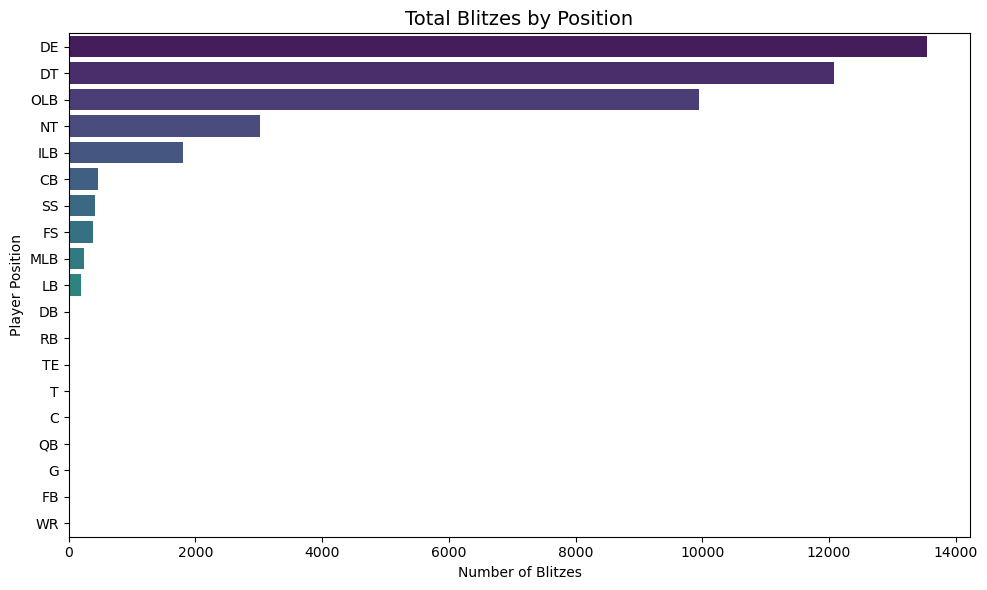

In [10]:
# Group by position to see who blitzes most
blitz_by_position = (
    blitz_df.groupby('position')['isBlitz']
    .sum()
    .reset_index()
    .sort_values(by='isBlitz', ascending=False)
)

# Plot blitz count by position
plt.figure(figsize=(10, 6))
sns.barplot(data=blitz_by_position, x='isBlitz', y='position', palette='viridis', hue='position', legend=False)

plt.title('Total Blitzes by Position', fontsize=14)
plt.xlabel('Number of Blitzes')
plt.ylabel('Player Position')
plt.tight_layout()
plt.show()

In [11]:
# Merge plays into blit_df
blitz_df = blitz_df.merge(
    plays_df[['gameId', 'playId', 'isDropback', 'qbSpike', 'qbKneel', 'playAction']],
    on=['gameId', 'playId'], how='left'
)

# Keep valid pass plays only
blitz_df = blitz_df[
    (blitz_df['isDropback'] == True) &
    (blitz_df['qbSpike'] != True) &
    (blitz_df['qbKneel'] != True) &
    (blitz_df['playAction'] != True)
]

In [12]:
# Double check filtering
blitz_df.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,isBlitz,position,isDropback,qbSpike,qbKneel,playAction
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,G,True,False,0,False
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,C,True,False,0,False
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,0,WR,True,False,0,False
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,T,True,False,0,False
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0,WR,True,False,0,False
